In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import h5py
import copy
import glob
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

In [2]:
lats = np.load('d:\\jupyter\\lats.npy')
lons = np.load('d:\\jupyter\\lons.npy')
matrix = np.load('d:\\jupyter\\matrix.npy')

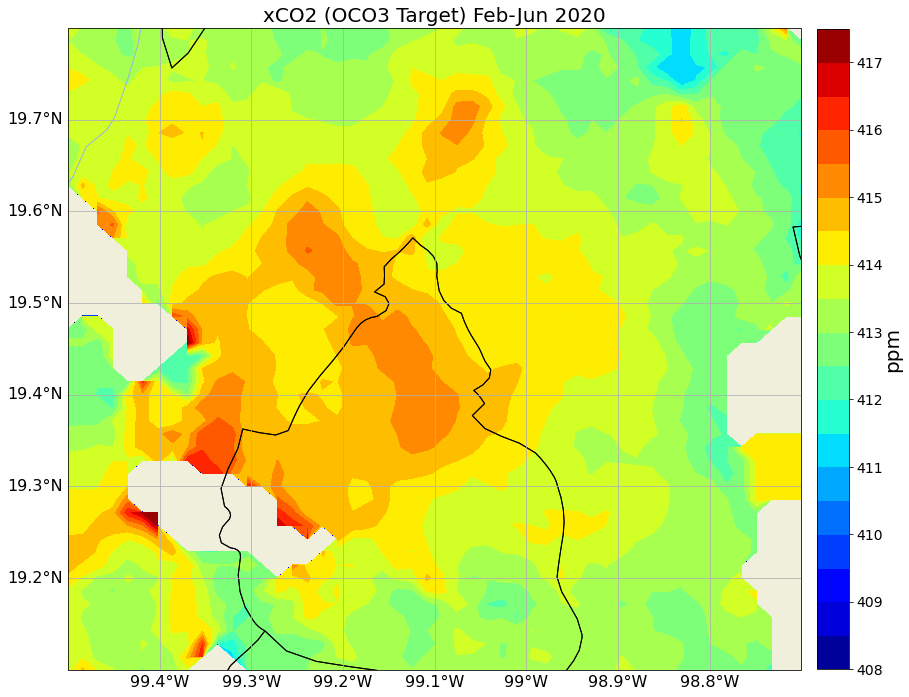

In [20]:
plt.figure(figsize=(14,14))
fontsize = 20
ticksize = 14
# Creates the map
mxmap = plt.axes(projection=ccrs.PlateCarree())

mxmap.add_feature(cfeature.LAND)
mxmap.add_feature(cfeature.OCEAN)
mxmap.add_feature(cfeature.COASTLINE)
mxmap.add_feature(cfeature.BORDERS, linestyle=':')
mxmap.add_feature(cfeature.LAKES, alpha=0.5)
mxmap.add_feature(cfeature.RIVERS)
mxmap.add_feature(cfeature.STATES.with_scale('10m'))
mxmap.set_extent((-99.5,-98.7,19.1,19.8))
#mxmap.xaxis.set_visible(True)
#mxmap.yaxis.set_visible(True)

glines = mxmap.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
glines.xformatter = LongitudeFormatter()
glines.yformatter = LatitudeFormatter()
glines.top_labels = None
glines.right_labels = None
glines.xlabel_style = {'size': 16}
glines.ylabel_style = {'size': 16}

lvls = np.arange(408,418,0.5)
plt.contourf(lons, lats, matrix, levels = lvls,cmap=plt.get_cmap("jet"),
             transform=ccrs.PlateCarree())
plt.title("xCO2 (OCO3 Target) Feb-Jun 2020",size=fontsize)
plt.xlabel("Longitude",size=fontsize)
plt.ylabel("Latitude",size=fontsize)
cbar= plt.colorbar(fraction=0.041, pad=.02)
cbar.set_label("ppm", size=fontsize, labelpad=0.8)
cbar.ax.tick_params(labelsize=ticksize)
#plt.savefig('target_avg.png')
plt.show()